In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats


In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

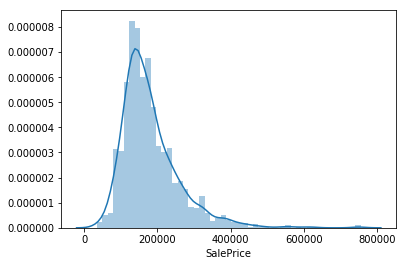

In [6]:
sns.distplot(df_train['SalePrice'])

In [7]:
print('Skewness: %f' % df_train['SalePrice'].skew())
print('Kurtosis: %f' % df_train['SalePrice'].kurt())
# what is kurtosis ?? __  ??
"""
living area
"""

Skewness: 1.882876
Kurtosis: 6.536282


'\nliving area\n'

In [11]:
# scatter plot grlivarea/saleprice

"""
GrLivArea: living area
介紹主要　variables　好棒棒網站:
https://towardsdatascience.com/data-preparation-and-preprocessing-is-just-as-important-creating-the-actual-model-in-data-sciences-2c0562b65f62
"""

var = "GrLivArea"
data = pd.concat([df_train["SalePrice"], df_train[var]], axis=1)
data

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198
5,143000,1362
6,307000,1694
7,200000,2090
8,129900,1774
9,118000,1077


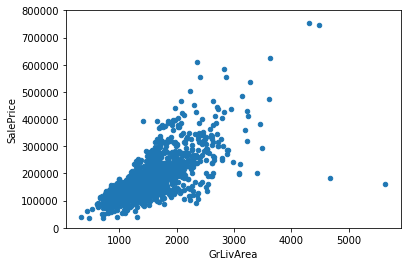

In [9]:
# x_label: 房子大小，　y_label: 摳摳＄
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

In [9]:
# scatter plot totalbsmtsf/saleprice

"""
TotalBsmtSF: this metric contains the total area of the basement in square feet (靠邀地下室啦)
介紹主要　variables　好棒棒網站:
https://towardsdatascience.com/data-preparation-and-preprocessing-is-just-as-important-creating-the-actual-model-in-data-sciences-2c0562b65f62
"""

var = "TotalBsmtSF"
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis=1)
data

,SalePrice,TotalBsmtSF
0,208500,856
1,181500,1262
2,223500,920
3,140000,756
4,250000,1145
5,143000,796
6,307000,1686
7,200000,1107
8,129900,952
9,118000,991


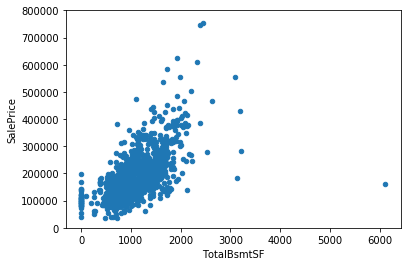

In [10]:
# x_label: 地下室大小，　y_label: 摳摳＄
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

(-0.5, 9.5, 0, 800000)

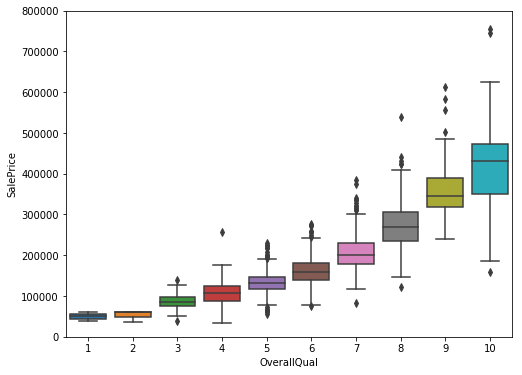

In [12]:
# bos plot overallqual / saleprice

"""
OverallQual: This metric rates the overall material and finish quality of the house. 
             It has ratings from 1 to 10 with 1 corresponding to ‘Very Poor’ and 10 being ‘Very Excellent’. 
             This categorical variable is actually an variable. We will have to treat it accordingly.
             (1 ~ 10 分: 房子整體建材和完整狀況)
介紹主要　variables　好棒棒網站:
https://towardsdatascience.com/data-preparation-and-preprocessing-is-just-as-important-creating-the-actual-model-in-data-sciences-2c0562b65f62
"""

var = "OverallQual"
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data = data)
fig.axis(ymin=0, ymax=800000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

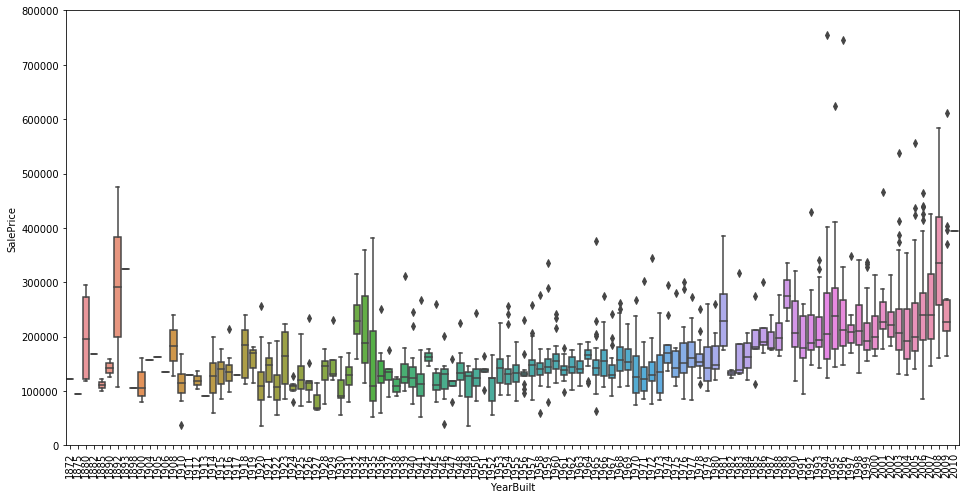

In [13]:
"""
YearBuilt: This variable gives you the year when the original construction of the property was done
           (房子建造的年份)
介紹主要　variables　好棒棒網站:
https://towardsdatascience.com/data-preparation-and-preprocessing-is-just-as-important-creating-the-actual-model-in-data-sciences-2c0562b65f62
"""

var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

### Correlation matrix

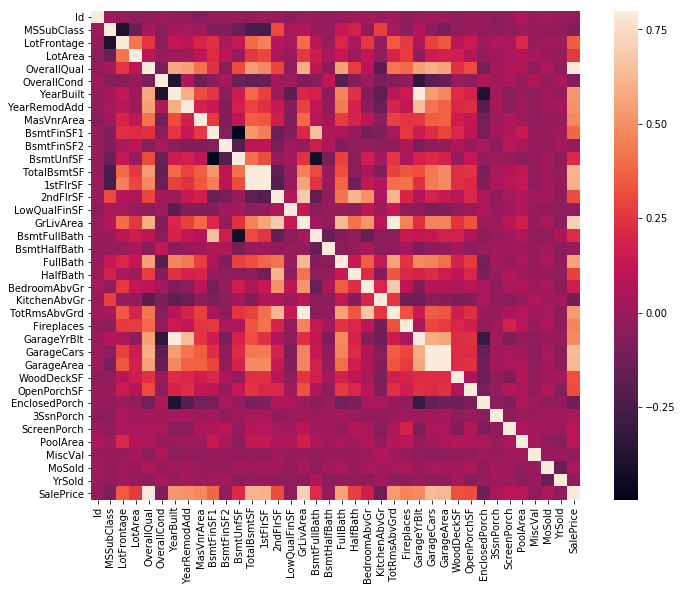

In [14]:
# correlation matrix

corrmat = df_train.corr()
f, ax =plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [15]:
# saleprice correlation matrix

k = 10 # number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [16]:
cm = np.corrcoef(df_train[cols].values.T)
# np.corrcoef ???
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html
cm

array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.62343144,
        0.61358055, 0.60585218, 0.56066376, 0.53372316, 0.52289733],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.56202176,
        0.5378085 , 0.47622383, 0.55059971, 0.42745234, 0.57232277],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.46899748,
        0.4548682 , 0.56602397, 0.63001165, 0.82548937, 0.19900971],
       [0.6404092 , 0.60067072, 0.46724742, 1.        , 0.88247541,
        0.43458483, 0.43931681, 0.46967204, 0.36228857, 0.53785009],
       [0.62343144, 0.56202176, 0.46899748, 0.88247541, 1.        ,
        0.48666546, 0.48978165, 0.40565621, 0.33782212, 0.47895382],
       [0.61358055, 0.5378085 , 0.4548682 , 0.43458483, 0.48666546,
        1.        , 0.81952998, 0.32372241, 0.28557256, 0.391452  ],
       [0.60585218, 0.47622383, 0.56602397, 0.43931681, 0.48978165,
        0.81952998, 1.        , 0.38063749, 0.40951598, 0.28198586],
       [0.56066376, 0.55059971, 0.6300116

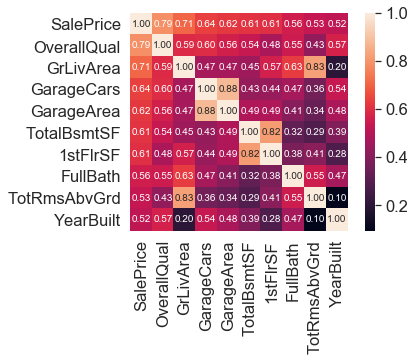

In [17]:
sns.set(font_scale=1.5)
# cm -->　抓出 和　SalePrice 相關係數最高的前十名的數值
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

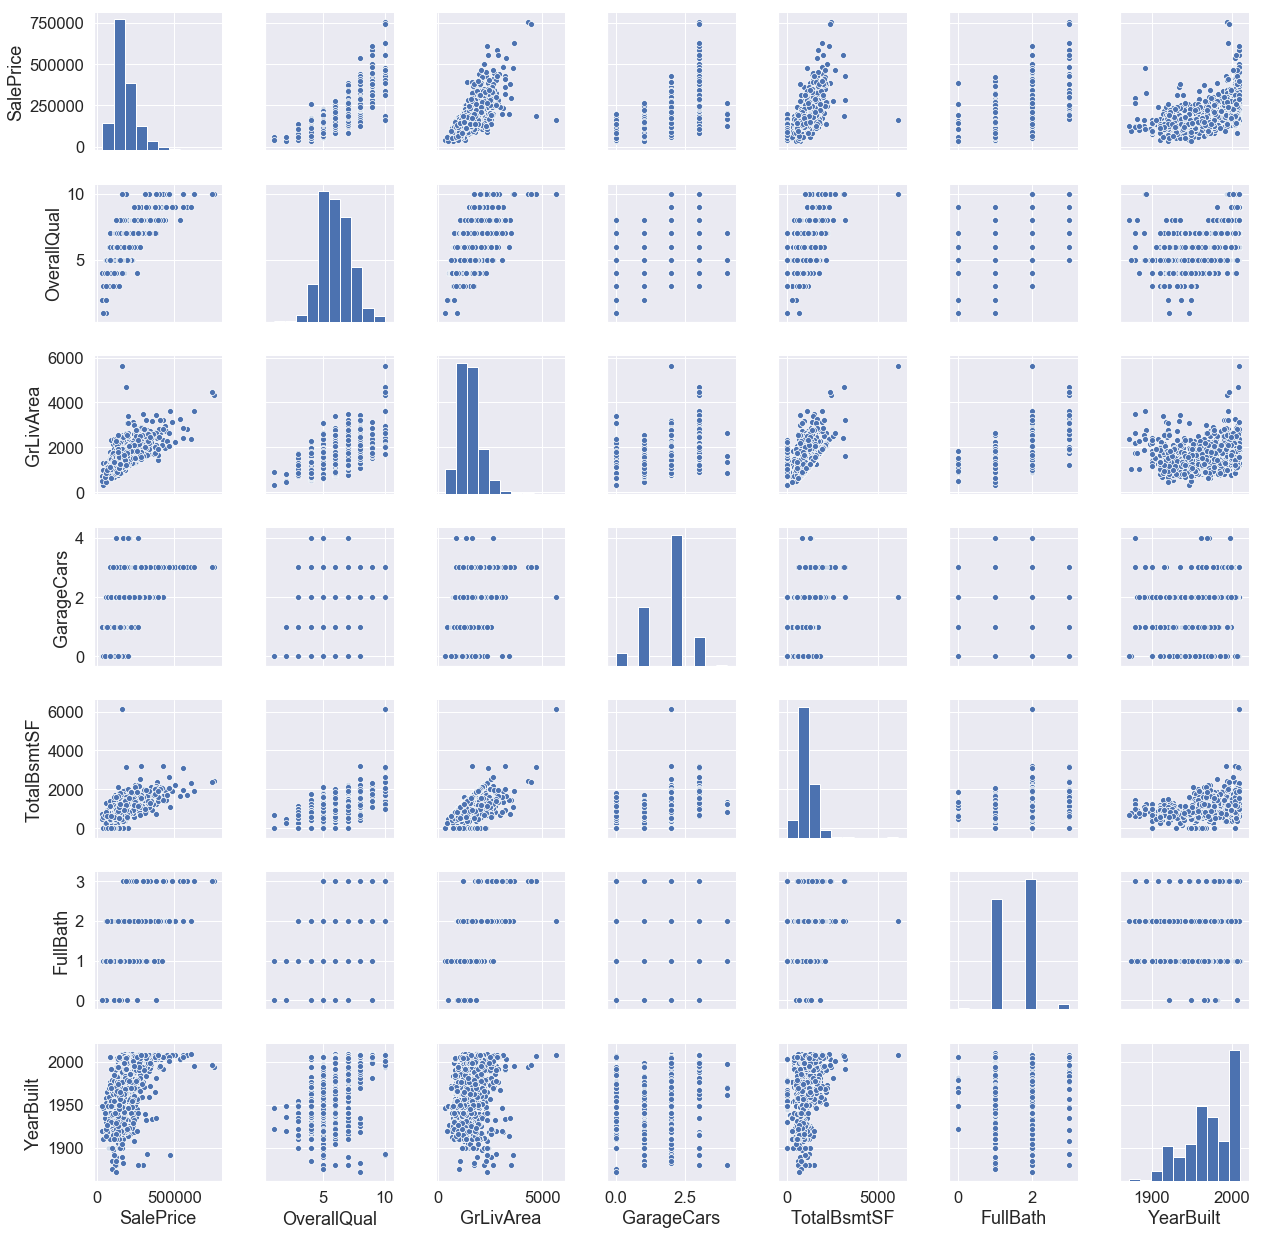

In [18]:
# scatterplot
# sns.set()
cols =['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], height = 2.5)
plt.show()

### Missing data

In [197]:
# missing data

total = df_train.isnull().sum().sort_values(ascending=False)
total

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [198]:
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending=False)
percent

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
LotFrontage      0.177397
GarageCond       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GarageFinish     0.055479
GarageQual       0.055479
BsmtExposure     0.026027
BsmtFinType2     0.026027
BsmtFinType1     0.025342
BsmtCond         0.025342
BsmtQual         0.025342
MasVnrArea       0.005479
MasVnrType       0.005479
Electrical       0.000685
Utilities        0.000000
YearRemodAdd     0.000000
MSSubClass       0.000000
Foundation       0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior2nd      0.000000
Exterior1st      0.000000
RoofMatl         0.000000
RoofStyle        0.000000
YearBuilt        0.000000
                   ...   
GarageArea       0.000000
PavedDrive       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
3SsnPorch        0.000000
BsmtUnfSF        0.000000
ScreenPorch      0.000000
PoolArea    

In [199]:
missing_data = pd.concat([total, percent], axis = 1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


### 刪除 missing data 

In [200]:
(missing_data[missing_data['Total']>1]).index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType'],
      dtype='object')

In [201]:
# 記得唷！　刪一次就好
df_train = df_train.drop( (missing_data[missing_data['Total']>1]).index , 1)

In [202]:
df_train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [203]:
df_train = df_train.drop( df_train.loc[df_train['Electrical'].isnull()].index )

In [204]:
#  再來看看有沒有　missing data 
df_train.isnull().sum().max()

0

### 處理　out liars!!!

In [205]:
# standardizing data 
# 機器學習 Book pg 124 有講到

saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:, np.newaxis])

## np.newaxis ?? 這是沙姣？

https://medium.com/@ian.dzindo01/what-is-numpy-newaxis-and-when-to-use-it-8cb61c7ed6ae

What it does:
Simply put, the newaxis expression is used to increase the dimension of the existing array by one more dimension, when used once. Thus,

- 1D array will become 2D array
- 2D array will become 3D array
- 3D array will become 4D array

and so on. It’s role is quite simple and yet there are plenty of problems where it’s a life saver.

In [206]:
saleprice_scaled

array([[ 0.34704187],
       [ 0.0071701 ],
       [ 0.53585953],
       ...,
       [ 1.07713679],
       [-0.48847623],
       [-0.42081658]])

In [207]:
low_range  = saleprice_scaled[saleprice_scaled[:, 0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][-10:]

In [208]:
print("outer range (low) of the distribution:")
print(low_range)
print("\nouter range (high) of the distribution:")
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


# A change in perspective is worth 80 IQ points

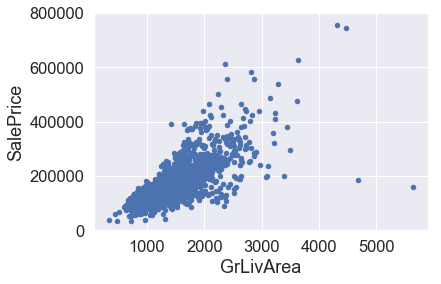

In [209]:
# bivariate analysis saleprice / grlivarea
var = "GrLivArea"
data = pd.concat([df_train["SalePrice"], df_train[var]], axis=1)
data.plot.scatter(x=var, y="SalePrice", ylim=(0, 800000))

In [210]:
# 找出前兩名
df_train.sort_values(by = 'GrLivArea', ascending= False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [211]:
# df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
# df_train = df_train.drop(df_train[df_train['Id'] == 524].index)
#  一樣的兒
df_train = df_train.drop(1298)
df_train = df_train.drop(523)

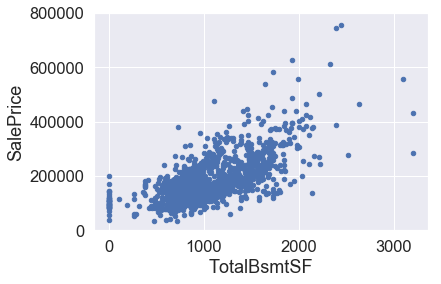

In [212]:
# bivariate analysis saleprice/grlivarea
var = "TotalBsmtSF"
data = pd.concat([df_train["SalePrice"], df_train[var]], axis = 1)
data.plot.scatter(x=var, y ="SalePrice", ylim=(0, 800000))

# 畫圖看 salePrice 表現

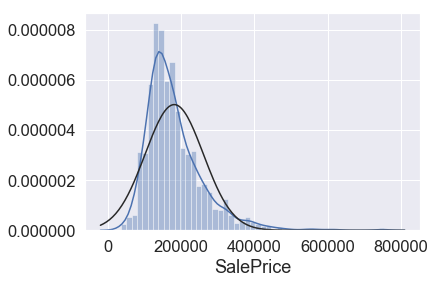

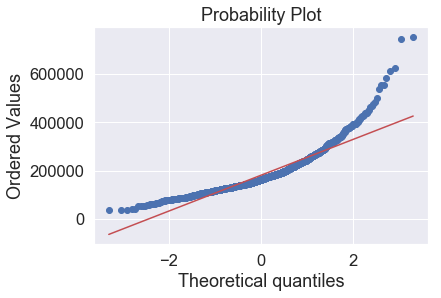

In [213]:
sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

# 觀察到 SalePrice 是 positive skewed -- > log transform

我的筆記: https://yuting3656.github.io/yutingblog/aiacademy/week3/practical-concerns

In [214]:
# applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

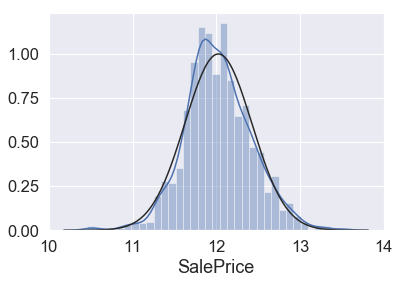

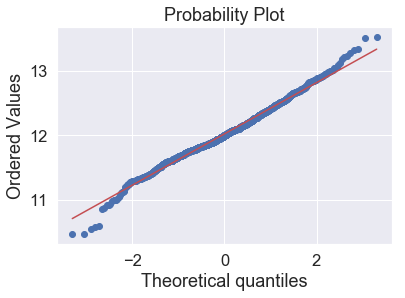

In [215]:
# transformed histogram and normal probability plot

sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

# 觀察 GrLivArea : positive skewed --> log transform

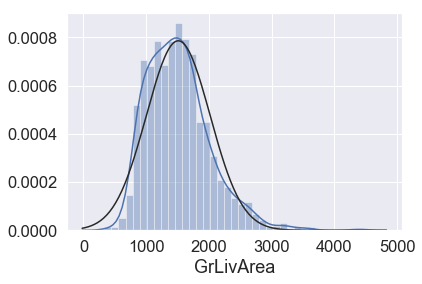

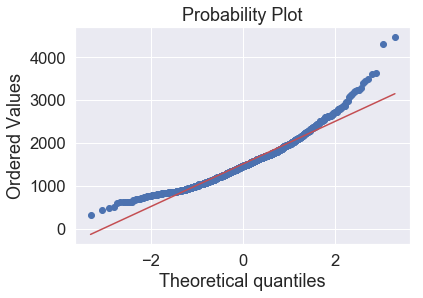

In [216]:
# histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [217]:
# data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

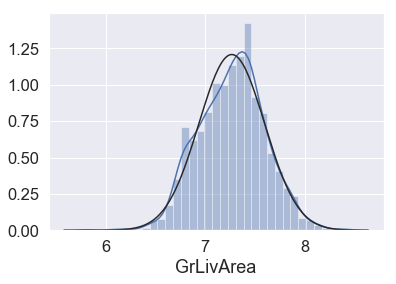

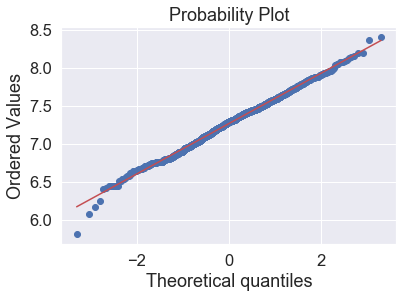

In [218]:
# transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

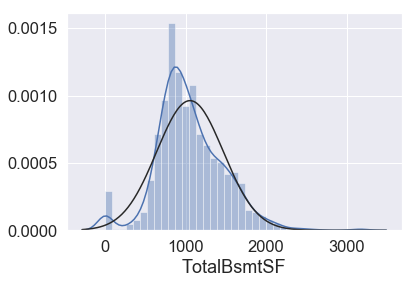

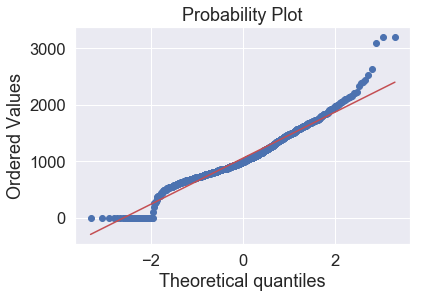

In [219]:
# histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

###  欄位裡面有0的

In [220]:
# create column for new variable (one is enough because it's a binary categorical feature)
# if area > 0 it gets 1, for area == 0 it gets 0

df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt']= 0
df_train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasBsmt
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,12.247694,0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,12.109011,0
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,12.317167,0
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,11.849398,0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,12.429216,0
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,320,0,0,700,10,2009,WD,Normal,11.870600,0
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,8,2007,WD,Normal,12.634603,0
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,350,11,2009,WD,Normal,12.206073,0
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,4,2008,WD,Abnorml,11.774520,0
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,2008,WD,Normal,11.678440,0


In [221]:
# 只要 TotalBsmSF > 0 就在新建 HasBsmt 給 1
df_train.loc[df_train['TotalBsmtSF'] > 0, 'HasBsmt'] = 1

In [230]:
# transform data 
df_train.loc[df_train['HasBsmt']  == 1, 'TotalBsmtSF' ] = np.log(df_train['TotalBsmtSF'])

C:\Users\tim23\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


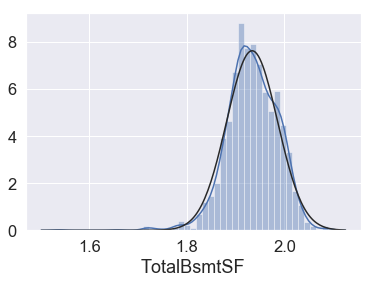

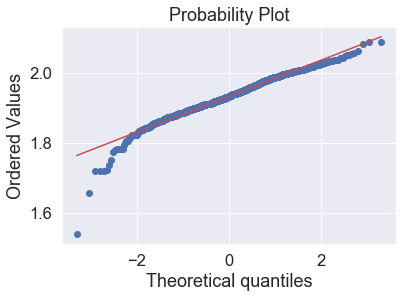

In [231]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

__In the search for writing 'homoscedasticity' right at the first attempt__

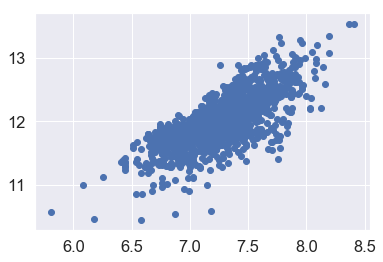

In [232]:
# scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])

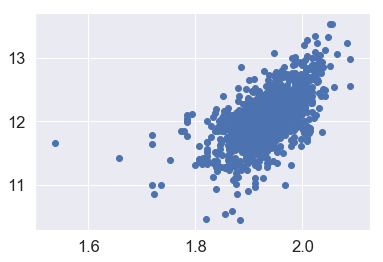

In [233]:
# scatter plot

plt.scatter( df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']) 

In [234]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      0
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1430    1
1431    1
1432    1
1433    1
1434    1
1435    1
1436    1
1437    1
1438    1
1439    1
1440    1
1441    1
1442    1
1443    1
1444    1
1445    1
1446    1
1447    1
1448    1
1449    1
1450    1
1451    1
1452    1
1453    1
1454    1
1455    1
1456    1
1457    1
1458    1
1459    1
Name: HasBsmt, Length: 1457, dtype: int64